<a href="https://colab.research.google.com/github/Finix-07/pytorch_practice/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Make Classification data and get it ready

In [47]:
import sklearn
import numpy as np

In [48]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [49]:
len(X), len(y)

(1000, 1000)

In [50]:
X[:5] , y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
    

In [51]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "Label": y})

In [52]:
circles.head()

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


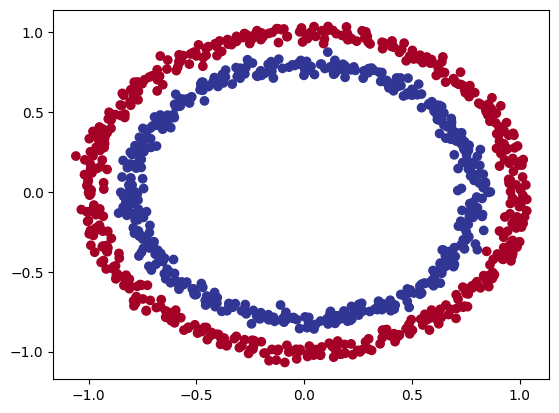

In [53]:
import matplotlib.pyplot as plt

plt.scatter(x = np.array(circles["X1"]),
            y = np.array(circles["X2"]),
            c = y,
            cmap = plt.cm.RdYlBu)


Note : Data we are working is often called toy dataset

### 1.1 Check input and output shapes

In [54]:
X.shape, y.shape

((1000, 2), (1000,))

In [55]:
# first example of features and labels
X_sample = X[0]
y_sample = y[0]



### 1.2 Turn data into tensors and create train and test splits

In [56]:
import torch
torch.__version__

'2.4.1+cu121'

In [57]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [59]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a Model

lets build a model to classify our blue and red dots
to do
1. set gpu if there
2. construc model with nn.module
3. define loss and optimizer
4. create training and test loop


In [60]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [61]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # take 2 (same as X)and upscale to 5
    self.layer_2 = nn.Linear(in_features = 5 , out_features = 1) # takes 5 and ouputs 1 (same as y)


  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [62]:
# lets replicate the model above using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [63]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5755,  0.5929],
                      [-0.2830,  0.1874],
                      [-0.2453,  0.0575],
                      [ 0.6592,  0.3258],
                      [-0.6128,  0.2807]])),
             ('0.bias', tensor([ 0.6712,  0.1860,  0.4741,  0.6971, -0.1083])),
             ('1.weight',
              tensor([[ 0.0928, -0.3108, -0.0922,  0.3312,  0.2293]])),
             ('1.bias', tensor([-0.2830]))])

In [64]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

untrained_preds[:10].squeeze(dim = 1), y_test[:10]

(tensor([-0.0550,  0.0431, -0.2626,  0.0036, -0.1836, -0.1243,  0.0895,  0.0505,
         -0.2656,  0.0506]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss 5 function and optimizer

which optimizer/ loss function to use??

for regression you might want --> MAE or MSE

for classification you might want --> binary cross entropy and Cross entropy


and for optimizers, two of most common are SGD and adam

In [65]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # has built in sigmoid activation so numerically stable

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [66]:
# Calculating accuracy - out of 100 what % is right
def accuracy_fn ( y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct  / len(y_pred)) * 100

  return acc

## 3. Training a Model

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 going from raw logits -> predictions probabilities -> prediction labels

our model outputs are going to be raw **logits**

we can convert these **logits** into prediction probabilities by passing them to some kind of activation function (eg sigmoid for binary classification and softmax for multiclass classification).

then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax()

In [67]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0550],
        [ 0.0431],
        [-0.2626],
        [ 0.0036],
        [-0.1836]])

In [68]:
# using sigmoid activation function on our model logits to turn them into predictions
y_pred_probs = torch.sigmoid(y_logits)

In [69]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 0., 1., 0.])

### 3.2 Training and test loop

In [70]:
torch.manual_seed(42)

# no of epochs
epochs = 1000

# Put data to target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# building training and val loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train) # wants logits (without sigmoid done)

  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                        y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69599, Acc: 47.38% | Test loss: 0.70167, Test acc: 47.00%
Epoch: 10 | Loss: 0.69478, Acc: 49.38% | Test loss: 0.70080, Test acc: 47.00%
Epoch: 20 | Loss: 0.69435, Acc: 49.88% | Test loss: 0.70038, Test acc: 47.00%
Epoch: 30 | Loss: 0.69413, Acc: 50.38% | Test loss: 0.70006, Test acc: 46.50%
Epoch: 40 | Loss: 0.69399, Acc: 50.75% | Test loss: 0.69976, Test acc: 45.00%
Epoch: 50 | Loss: 0.69388, Acc: 50.62% | Test loss: 0.69947, Test acc: 45.00%
Epoch: 60 | Loss: 0.69379, Acc: 51.00% | Test loss: 0.69919, Test acc: 46.50%
Epoch: 70 | Loss: 0.69371, Acc: 51.25% | Test loss: 0.69893, Test acc: 47.00%
Epoch: 80 | Loss: 0.69364, Acc: 51.38% | Test loss: 0.69868, Test acc: 46.00%
Epoch: 90 | Loss: 0.69357, Acc: 50.88% | Test loss: 0.69845, Test acc: 46.00%
Epoch: 100 | Loss: 0.69352, Acc: 51.00% | Test loss: 0.69824, Test acc: 46.00%
Epoch: 110 | Loss: 0.69347, Acc: 50.75% | Test loss: 0.69805, Test acc: 46.00%
Epoch: 120 | Loss: 0.69342, Acc: 51.00% | Test loss: 0.69787, T

## 4. Make predictions and evaluate the model

from the metrics it looks like our model isnt learning anything
sor to inspect it make predicitons and visualize

In [71]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo (if its not already downloaded)
if Path("helper_function.py").is_file():
  print("already here so skipping download")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

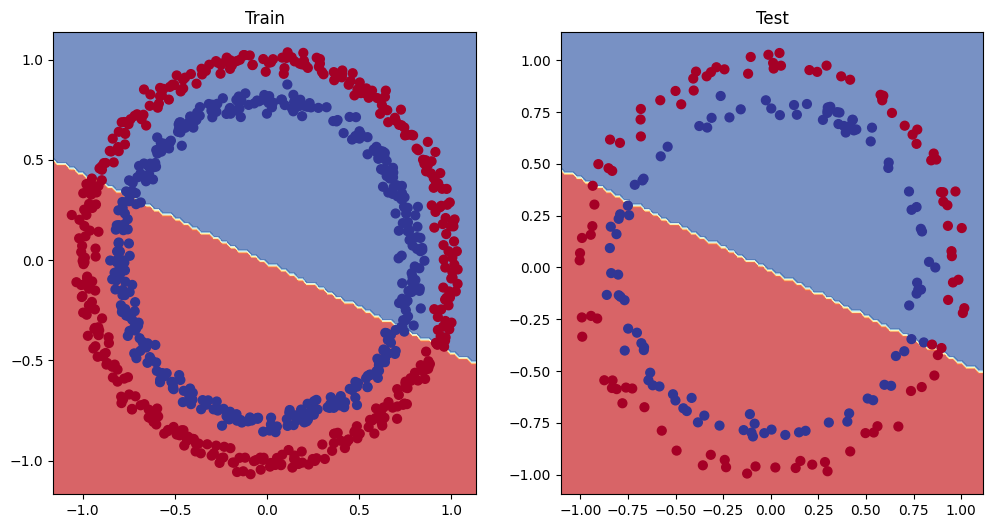

In [72]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model(from a model's perspective)

* Add more layers - give model more chance to learn abt patterns in the data
* Add more hidden units - GO FROM 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

these options are all from a model's perspective because they deal directly with the model, rather than the data.

and because these options are all values we can change, they are referred as **Hyperparameters**.


In [73]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5919,  0.5588],
                      [-0.2358,  0.2873],
                      [-0.2381,  0.0712],
                      [ 0.6141,  0.2329],
                      [-0.6486,  0.2049]])),
             ('0.bias', tensor([ 0.6848,  0.1468,  0.4671,  0.7358, -0.0786])),
             ('1.weight',
              tensor([[ 0.0828, -0.3263, -0.0166,  0.2360,  0.2353]])),
             ('1.bias', tensor([-0.1554]))])

Lets Try and improve by:
* adding more hidden units: 5 -> 10
* increasing number of layers: 2 -> 3
* increase the number of epochs: 100 -> 1000

(generally do 1 at a time, then do experiment tracking)

In [74]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):

    # z = self.layer_1(X)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z

    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [75]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [76]:
# Create a loss fn
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [77]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [78]:
X_train.size()

torch.Size([800, 2])

In [79]:
# Train for longer

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train).squeeze(dim = 1)

  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing loop

  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze(dim = 1)
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69369, Acc: 50.25% | Test loss: 0.69270, Test acc: 50.00%
Epoch: 20 | Loss: 0.69351, Acc: 50.12% | Test loss: 0.69283, Test acc: 49.50%
Epoch: 30 | Loss: 0.69339, Acc: 50.50% | Test loss: 0.69297, Test acc: 48.00%
Epoch: 40 | Loss: 0.69329, Acc: 50.38% | Test loss: 0.69310, Test acc: 49.00%
Epoch: 50 | Loss: 0.69322, Acc: 49.88% | Test loss: 0.69324, Test acc: 50.00%
Epoch: 60 | Loss: 0.69317, Acc: 49.38% | Test loss: 0.69336, Test acc: 51.50%
Epoch: 70 | Loss: 0.69312, Acc: 49.38% | Test loss: 0.69348, Test acc: 50.50%
Epoch: 80 | Loss: 0.69309, Acc: 50.12% | Test loss: 0.69359, Test acc: 50.00%
Epoch: 90 | Loss: 0.69307, Acc: 50.50% | Test loss: 0.69370, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 110 | Loss: 0.69303, Acc: 50.88% | Test loss: 0.69388, Test acc: 46.50%
Epoch: 120 | Loss: 0.69302, Acc: 50.75% | Test loss: 0.69396, T

In [80]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5399,  0.5868],
                      [-0.1618,  0.6521],
                      [-0.1579,  0.1408],
                      [-0.3461,  0.4142],
                      [ 0.6176, -0.5224],
                      [ 0.6211,  0.1368],
                      [ 0.5210,  0.0951],
                      [ 0.3388, -0.1010],
                      [ 0.5338,  0.0974],
                      [-0.3410,  0.1731]])),
             ('layer_1.bias',
              tensor([-0.3256, -0.0830, -0.2871,  0.4692, -0.5580, -0.3260, -0.1995, -0.4250,
                       0.0671, -0.6982])),
             ('layer_2.weight',
              tensor([[ 0.2973, -0.2652,  0.2434,  0.0517, -0.0992,  0.2043,  0.0567,  0.2590,
                        0.0422, -0.1024],
                      [ 0.0644, -0.0915,  0.1344,  0.2843,  0.1761, -0.1541,  0.1695,  0.0502,
                        0.1472, -0.1882],
                      [-0.2934, -0.1167, -0.2438,  0.2577,  0.0973,  0.1

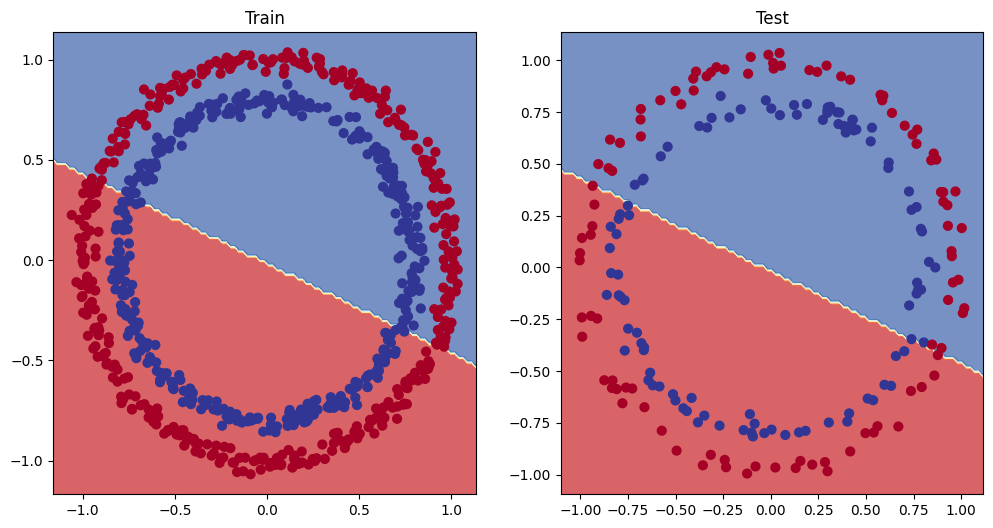

In [81]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [82]:
# making a new model to account for non linearity in our dataset

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()


  def forward(self, x):
    return (self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))

model_2 = CircleModelV2().to(device)
model_2


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [83]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)



In [84]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [85]:
epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_2.train()

  y_logits = model_2(X_train).squeeze(dim = 1)

  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()

  with torch.inference_mode():

    test_logits = model_2(X_test).squeeze(dim = 1)
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 10 | Loss: 0.69248, Acc: 50.50% | Test loss: 0.69260, Test acc: 50.00%
Epoch: 20 | Loss: 0.69225, Acc: 59.13% | Test loss: 0.69231, Test acc: 56.50%
Epoch: 30 | Loss: 0.69209, Acc: 70.25% | Test loss: 0.69212, Test acc: 68.00%
Epoch: 40 | Loss: 0.69195, Acc: 68.38% | Test loss: 0.69195, Test acc: 71.00%
Epoch: 50 | Loss: 0.69181, Acc: 58.25% | Test loss: 0.69177, Test acc: 58.00%
Epoch: 60 | Loss: 0.69168, Acc: 54.00% | Test loss: 0.69161, Test acc: 54.50%
Epoch: 70 | Loss: 0.69155, Acc: 53.12% | Test loss: 0.69146, Test acc: 53.00%
Epoch: 80 | Loss: 0.69141, Acc: 52.62% | Test loss: 0.69132, Test acc: 53.00%
Epoch: 90 | Loss: 0.69128, Acc: 52.75% | Test loss: 0.69117, Test acc: 53.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 110 | Loss: 0.69103, Acc: 52.88% | Test loss: 0.69088, Test acc: 53.50%
Epoch: 120 | Loss: 0.69090, Acc: 53.12% | Test loss: 0.69074, T

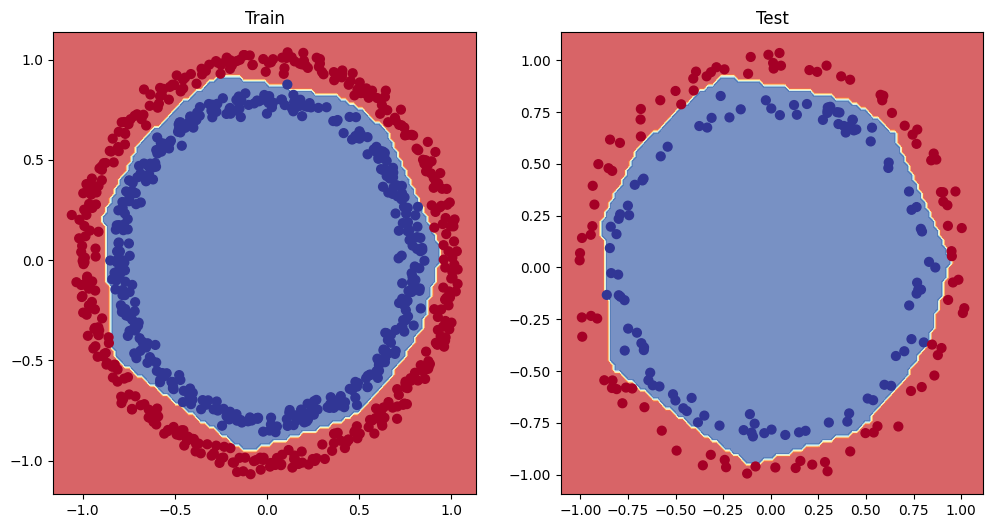

In [86]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

## 8. Putting it all together with multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs not spam)
* Multi-class classification = more than one thing or another (cat or dog or another)

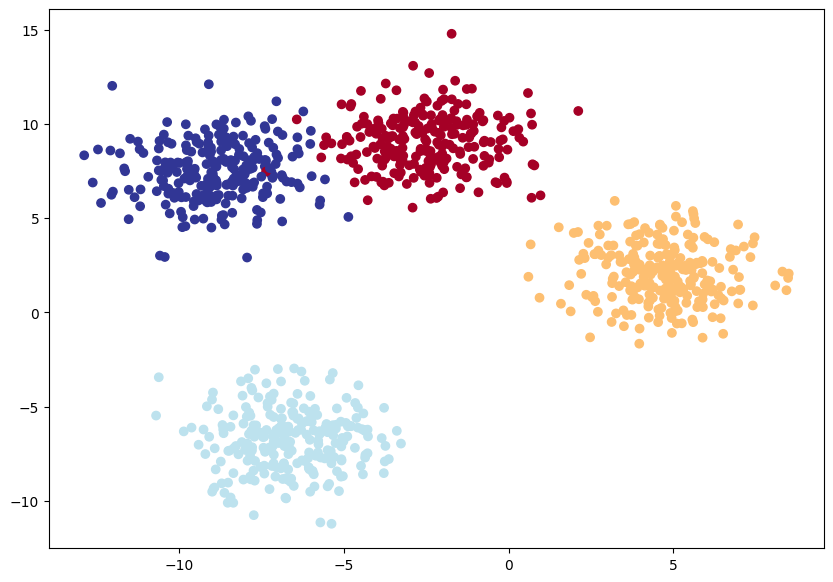

In [87]:
# Import dependencies

import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a lil shake up
                            random_state = RANDOM_SEED)

# Turn data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # in documentation we need to feed cross entropy loss with a longtensor type else give data type error

# turn into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                    y_blob,
                                                                    test_size = 0.2,
                                                                    random_state = RANDOM_SEED)

# 4. Plot data

plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu);



## 8.2 bulding a multi-class classification nodel in PyTorch

In [88]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [89]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """ Initialize multi-class classification model.


    Args:
      input_featues (int): Number of input features of the model
      output_features (int): Number of outputs features(number of output classes)
      hidden_units (int): number of hidden units between layers, default 8

    Returns:

    Example:
    """

    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)


model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [90]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

In [91]:
epochs = 100

for epoch in range(epochs):


  model_4.train()

  y_logits = model_4(X_blob_train)

  y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1) # From logits to prediction probabilities do softmax then to get prediction take argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train, y_pred = y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  # testing
  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits , y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 2.13841, Acc: 1.75% | Test loss: 1.09025, Test acc: 48.0%
Epoch: 10 | Loss: 0.37436, Acc: 89.00% | Test loss: 0.32992, Test acc: 80.5%
Epoch: 20 | Loss: 0.12644, Acc: 98.75% | Test loss: 0.11471, Test acc: 99.0%
Epoch: 30 | Loss: 0.07718, Acc: 99.00% | Test loss: 0.07082, Test acc: 99.5%
Epoch: 40 | Loss: 0.05883, Acc: 99.00% | Test loss: 0.05214, Test acc: 99.5%
Epoch: 50 | Loss: 0.04937, Acc: 99.00% | Test loss: 0.04224, Test acc: 99.5%
Epoch: 60 | Loss: 0.04370, Acc: 99.00% | Test loss: 0.03618, Test acc: 99.5%
Epoch: 70 | Loss: 0.03997, Acc: 99.00% | Test loss: 0.03213, Test acc: 99.5%
Epoch: 80 | Loss: 0.03735, Acc: 99.00% | Test loss: 0.02924, Test acc: 99.5%
Epoch: 90 | Loss: 0.03542, Acc: 99.00% | Test loss: 0.02708, Test acc: 99.5%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [97]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
y_logits[:10], y_preds

(tensor([[  3.6612,   8.8301, -12.3561,  -8.8035],
         [  3.9148, -10.4133,   2.1763,   9.3920],
         [ -8.0021, -10.9729,  19.5329,  11.3022],
         [  0.7978,   6.5658,  -6.5374,  -6.3274],
         [  7.6894,   2.5730, -13.2343,  -3.3441],
         [  4.4883, -12.9441,   3.3203,  11.7224],
         [ -8.3631,  -8.2473,  17.9361,   8.7627],
         [  6.4801,  -0.8490,  -8.8686,   0.0367],
         [ -8.1244, -15.4799,  23.1944,  15.5848],
         [  6.7812,   0.4078, -10.2688,  -1.1884]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
         2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
  

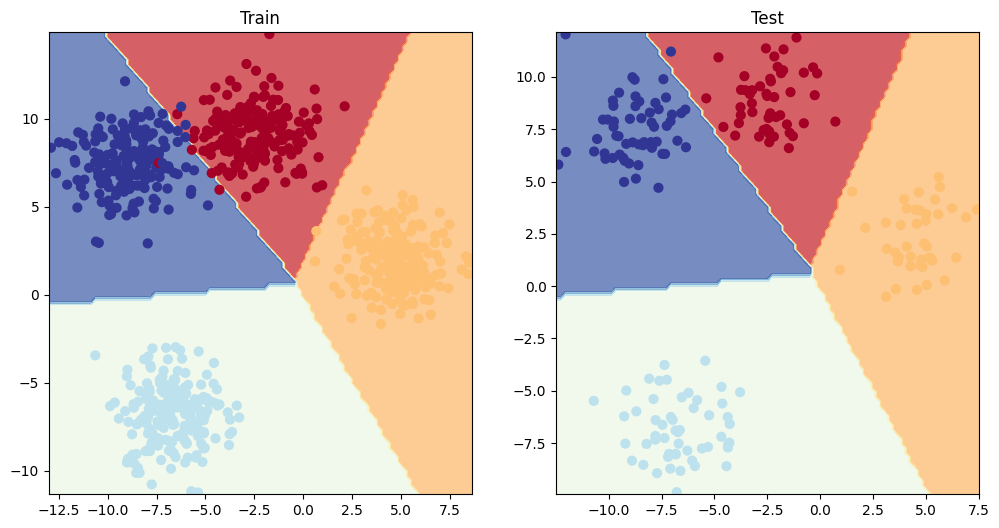

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out 100 how many model got right

* Precision -

* Recall -

* F1-score

* confusion matrix

* classification report